In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import pylab

In [114]:
C15 = pd.read_csv("arduinoOutput_15C-2.csv", names=["time", "set", "temp", "output", "fan" ])
C15["time"] = round(C15["time"]/60000, 2)
C15 = C15.loc[C15.temp < 30]

C28 = pd.read_csv("arduinoOutput_28.csv", names=["time", "set", "temp", "output", "fan" ])
C28["time"] = round(C28["time"]/60000, 2)

C30 = pd.read_csv("arduinoOutput_30C.csv", names=["time", "set", "temp", "output", "fan" ])
C30["time"] = round(C30["time"]/60000, 2)
#C30["time"].head()  

C31 = pd.read_csv("arduinoOutput_31C.csv", names=["time", "set", "temp", "output", "fan" ])
C31["time"] = round(C31["time"]/60000, 2)



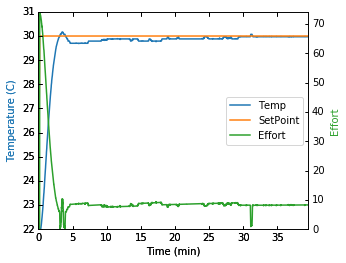

In [130]:
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()

offset = 60
#new_fixed_axis = par2.get_grid_helper().new_fixed_axis

host.set_xlim(0, C30["time"].max())
host.set_ylim(22, 31)

host.set_xlabel("Time (min)")
host.set_ylabel("Temperature (C)")
par1.set_ylabel("Effort")

p1, = host.plot(C30["time"], C30["temp"], label="Temp")
p3 = host.plot(C30["time"], C30["set"], label="SetPoint")
p2, = par1.plot(C30["time"], C30["output"], label="Effort")

par1.set_ylim(0, C30["output"].max())

host.legend(loc = 7)

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())

plt.savefig('Arduino30C_curve.pdf', bbox='tight')

plt.draw()
plt.show()

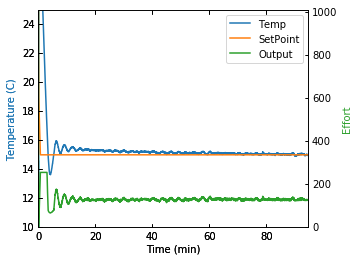

In [129]:
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()

offset = 60
#new_fixed_axis = par2.get_grid_helper().new_fixed_axis

host.set_xlim(0, C15["time"].max())
host.set_ylim(10, 25)

host.set_xlabel("Time (min)")
host.set_ylabel("Temperature (C)")
par1.set_ylabel("Effort")

p1, = host.plot(C15["time"], C15["temp"], label="Temp")
p3 = host.plot(C15["time"], C15["set"], label="SetPoint")
p2, = par1.plot(C15["time"], C15["output"], label="Output")

par1.set_ylim(0, C15["output"].max())

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())

#labels = [item.get_text() for item in host.get_xticklabels()]
#labels[0] = 'Initializing'

#host.set_xticklabels(labels)

plt.savefig('Arduino15C_curve.pdf', bbox='tight')

plt.draw()
plt.show()

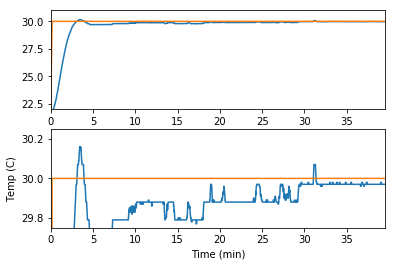

In [102]:
plt.figure(1)
plt.subplot(211)
plt.plot(C30["time"], C30["temp"])
plt.plot(C30["time"], C30["set"])
plt.axis([0,C30["time"].max(),22,31])


plt.subplot(212)
plt.plot(C30["time"], C30["temp"])
plt.plot(C30["time"], C30["set"])
plt.axis([0,C30["time"].max(),29.75,30.25])
plt.ylabel("Temp (C)")
plt.xlabel("Time (min)")

plt.savefig('Arduino30C_curves.pdf', bbox='tight')

plt.show()

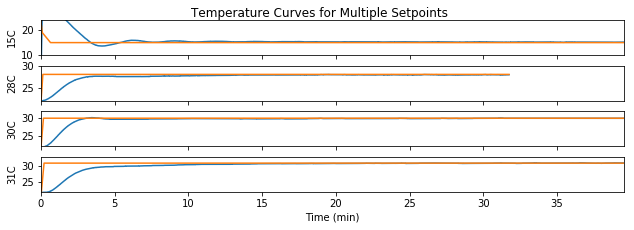

In [126]:
fig, axs = plt.subplots(4, 1, figsize=(9, 3), sharey=False, sharex=True)
fig.subplots_adjust(top=0.92, left=0.07, right=0.97,
                    hspace=0.3, wspace=0.3)
axs[0].plot(C15["time"], C15["temp"])
axs[0].plot(C15["time"], C15["set"])
axs[0].axis([0,C15["time"].max(),10,24])
axs[0].set_ylabel('15C')

axs[1].plot(C28["time"], C28["temp"])
axs[1].plot(C28["time"], C28["set"])
axs[1].axis([0,C28["time"].max(),22,30])
axs[1].set_ylabel('28C')

axs[2].plot(C30["time"], C30["temp"])
axs[2].plot(C30["time"], C30["set"])
axs[2].axis([0,C30["time"].max(),22,32])
axs[2].set_ylabel('30C')

axs[3].plot(C31["time"], C31["temp"])
axs[3].plot(C31["time"], C31["set"])
axs[3].axis([0,C30["time"].max(),22,33])
axs[3].set_ylabel('31C')
axs[3].set_xlabel('Time (min)')

plt.suptitle('Temperature Curves for Multiple Setpoints')

plt.savefig('ArduinoTempCurves.pdf', bbox='tight')

plt.show()